猫狗分类

先进行数据的预处理

In [ ]:
import os, shutil

original_dataset_dir = './dataset/kaggle/train' #原数据位置

base_dir = './dogs_and_cats_small' #选取的数据的新位置
os.mkdir(base_dir) #创建新位置文件夹

#在新文件夹中依次新增‘train’，‘validation’，‘test’文件夹
train_dir = os.path.join(base_dir, 'train') 
os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

#在‘train’文件夹中新增‘dogs’，‘cats’文件夹
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

#在‘validation’文件夹中新增‘dogs’，‘cats’文件夹
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

#在‘test’文件夹新增‘dogs’，‘cats’文件夹
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

#将原数据中前1000张猫的图片复制到train_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname) #原位置
    dst = os.path.join(train_cats_dir, fname) #目标位置
    shutil.copyfile(src, dst) #复制文件

#将原数据中1000-1500张猫的图片复制到validation_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

#将原数据中1500-2000张猫的图片复制到test_cats_dir
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

#将原数据中前1000张狗的图片复制到train_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

#将原数据中1000-1500张狗的图片复制到validation_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1000,1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

#将原数据中1500-2000张狗的图片复制到test_dogs_dir
fnames = ['dog.{}.jpg'.format(i) for i in range(1500,2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

进行代码编写：

一个使用pytorch自带的resnet网络

一个自己的vgg网络

In [87]:
import torch 
import torchvision
from torchvision import datasets,models,transforms
import os
from torch.autograd import Variable
import torch.nn as nn
import torch.utils.data
import torch.nn.functional as F
#from network import Net

In [88]:
class Net(nn.Module):                                       # 新建一个网络类，就是需要搭建的网络，必须继承PyTorch的nn.Module父类
    def __init__(self):                                     # 构造函数，用于设定网络层
        super(Net, self).__init__()                         # 标准语句
        self.conv1 = torch.nn.Conv2d(3, 16, 3, padding=1)   # 第一个卷积层，输入通道数3，输出通道数16，卷积核大小3×3，padding大小1，其他参数默认
        self.conv2 = torch.nn.Conv2d(16, 32, 3, padding=1)  
        self.conv3 = torch.nn.Conv2d(32, 64, 3, padding=1) 

        self.fc1 = nn.Linear(56*56*16, 128)                 # 第一个全连层，线性连接，输入节点数50×50×16，输出节点数128
        self.fc2 = nn.Linear(128, 2)                       

        self.max_pool = nn.MaxPool2d(2)                     

    def forward(self, x):                                    # 重写父类forward方法，即前向计算，通过该方法获取网络输入数据后的输出值
        x = self.max_pool(F.relu(self.conv1(x)))                            
        x = self.max_pool(F.relu(self.conv2(x)))   
        x = self.max_pool(F.relu(self.conv3(x)))                          

        x = x.view(x.size()[0], -1)   
                               
        x = F.relu(self.fc1(x))                                                          
        y = self.fc2(x)                                      

        return y

In [89]:
data_dir = "./dogs_and_cats_small/"
#图片处理
data_trainsforms = {
    "train":transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
    ]),
    
    "test":transforms.Compose([
    transforms.Resize((224,224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
   ]),}

#拼接路径
image_datasets = {
    x:datasets.ImageFolder(root=os.path.join(data_dir, x),
                          transform=data_trainsforms[x])
            for x in ["train", "test"]
}

In [90]:
#数据加载器
data_loader = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=20, shuffle=True) for x in ["train", "test"] }

X_example,y_example = next(iter(data_loader["train"]))
example_classees = image_datasets["train"].classes
index_classes = image_datasets["train"].class_to_idx

#迁移学习模型
# model = models.resnet50(pretrained = True)
#自定义模型
model = Net()

Use_gpu = torch.cuda.is_available()

# for parma in model.parameters():
#     parma.requires_grad = False#屏蔽预训练模型的权重，只训练最后一层的全连接的权重
# model.fc = torch.nn.Linear(2048,2)
# print(model)

if Use_gpu:
    model = model.cuda()

In [69]:
print(model)

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=50176, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=2, bias=True)
  (max_pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
)


In [91]:
#损失函数和优化器
loss_f = torch.nn.CrossEntropyLoss()
# optimizer = torch.optim.Adam(model.fc.parameters(),lr = 0.00001)
optimizer = torch.optim.Adam(model.parameters(),lr = 0.00001)

In [92]:
epoch_n = 10

t_loss = {'train': [] , 'test': []}
acc = {'train': [], 'test': []}

for epoch in range(epoch_n):
    print("Epoch {}/{}".format(epoch,epoch_n - 1))
    print("-"*10)
    
    for phase in ["train","test"]:
        if phase == "train":
            print("training")
            # model.train(True)
        else:
            print("testing")
            # model.train(False)
        running_loss = 0.0
        running_corrects = 0

        for batch,data in enumerate(data_loader[phase],1):
            X,y = data
            if Use_gpu:
                X,y = Variable(X.cuda()),Variable(y.cuda())
            else:
                X,y = Variable(X),Variable(y)
            
            y_pred = model(X)

            _,pred = torch.max(y_pred.data,1)
            optimizer.zero_grad()
            loss = loss_f(y_pred,y)
            if phase == "train":
                loss.backward()#反向传播计算当前梯度# 误差反向传播，采用求导的方式，计算网络中每个节点参数的梯度，显然梯度越大说明参数设置不合理，需要调整
                optimizer.step()#优化采用设定的优化方法对网络中的各个参数进行调整
            running_loss += loss.item()
            running_corrects += torch.sum(pred == y.data)
            # if batch%250 == 0 and phase == "train":
            #     loss = running_loss/batch
            #     acc = 100*running_corrects/(20*batch)
            #     print("Batch{},Train Loss:{:.4f},Train ACC:{:.4f}".format(batch, loss, acc))
        epoch_loss = running_loss*20/len(image_datasets[phase]) 
        epoch_acc = 100*running_corrects/len(image_datasets[phase])
        print("{} Loss:{:.4f} Acc:{:.4f}%".format(phase,epoch_loss,epoch_acc))
        t_loss[phase].append(epoch_loss)
        acc[phase].append(epoch_acc.item())
        
#torch.save(model.state_dict(),'model.ckpt1')
# torch.save(model.state_dict(),'model.pth'
print("over")


Epoch 0/9
----------
training
train Loss:0.6479 Acc:64.9000%
testing
test Loss:0.5972 Acc:81.3000%
Epoch 1/9
----------
training
train Loss:0.5744 Acc:83.1500%
testing
test Loss:0.5402 Acc:89.5000%
Epoch 2/9
----------
training
train Loss:0.5235 Acc:89.4500%
testing
test Loss:0.4898 Acc:92.1000%
Epoch 3/9
----------
training
train Loss:0.4776 Acc:91.5000%
testing
test Loss:0.4472 Acc:93.9000%
Epoch 4/9
----------
training
train Loss:0.4379 Acc:93.3500%
testing
test Loss:0.4058 Acc:95.3000%
Epoch 5/9
----------
training
train Loss:0.4061 Acc:94.1000%
testing
test Loss:0.3767 Acc:95.9000%
Epoch 6/9
----------
training
train Loss:0.3811 Acc:93.8000%
testing
test Loss:0.3510 Acc:95.7000%
Epoch 7/9
----------
training
train Loss:0.3559 Acc:94.6000%
testing
test Loss:0.3245 Acc:96.9000%
Epoch 8/9
----------
training
train Loss:0.3311 Acc:95.5000%
testing
test Loss:0.3032 Acc:96.9000%
Epoch 9/9
----------
training
train Loss:0.3177 Acc:94.8000%
testing
test Loss:0.2858 Acc:97.0000%
over


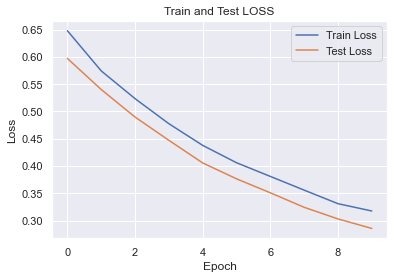

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns

# 对测试Loss进行可视化
def sinplot(flip=1):
    plt.plot(t_loss['train'], label='Train Loss')
    plt.plot(t_loss['test'], label='Test Loss')
    plt.legend(loc='best')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Train and Test LOSS')

sns.set_theme()
sinplot()

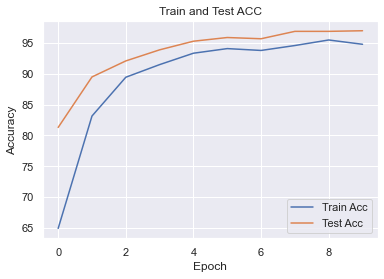

In [94]:
# 对测试准确率进行可视化
def sinplot(flip=1):
    plt.plot(acc['train'], label='Train Acc')
    plt.plot(acc['test'], label='Test Acc')
    plt.legend(loc='lower right')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Train and Test ACC')

sns.set_theme()
sinplot()